In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import arff
import pandas as pd
import seaborn as sns
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = arff.loadarff(r'C:\Users\gupta\Desktop\datas\Autism-Adolescent-Data.arff')
df = pd.DataFrame(data[0])

In [3]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'0',b'0',b'0',b'1',b'1',b'1',b'1',b'1',b'1',b'0',...,b'm',b'Hispanic',b'yes',b'yes',b'Austria',b'no',6.0,b'12-16 years',b'Parent',b'NO'
1,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',...,b'm',b'Black',b'no',b'no',b'Austria',b'no',2.0,b'12-16 years',b'Relative',b'NO'
2,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',...,b'f',b'?',b'no',b'no',b'AmericanSamoa',b'no',2.0,b'12-16 years',b'?',b'NO'
3,b'0',b'1',b'1',b'1',b'1',b'1',b'0',b'1',b'1',b'0',...,b'f',b'White-European',b'no',b'no',b'United Kingdom',b'no',7.0,b'12-16 years',b'Self',b'YES'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'0',b'0',b'0',...,b'f',b'?',b'no',b'no',b'Albania',b'no',7.0,b'12-16 years',b'?',b'YES'


In [4]:
df = df.replace(b'0',0)
df = df.replace(b'1',1)
df = df.replace(b'm',1)
df = df.replace(b'f',0)
df = df.replace(b'yes',1)
df = df.replace(b'no',0)
df = df.replace(b'YES',1)
df = df.replace(b'NO',0)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,...,1,b'Hispanic',1,1,b'Austria',0,6.0,b'12-16 years',b'Parent',0
1,0,0,0,0,0,0,0,0,1,1,...,1,b'Black',0,0,b'Austria',0,2.0,b'12-16 years',b'Relative',0
2,0,0,0,0,0,0,0,0,1,1,...,0,b'?',0,0,b'AmericanSamoa',0,2.0,b'12-16 years',b'?',0
3,0,1,1,1,1,1,0,1,1,0,...,0,b'White-European',0,0,b'United Kingdom',0,7.0,b'12-16 years',b'Self',1
4,1,1,1,1,1,1,1,0,0,0,...,0,b'?',0,0,b'Albania',0,7.0,b'12-16 years',b'?',1


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A1_Score,104.0,0.730769,0.445708,0.0,0.00,1.0,1.0,1.0
A2_Score,104.0,0.538462,0.500933,0.0,0.00,1.0,1.0,1.0
A3_Score,104.0,0.653846,0.478047,0.0,0.00,1.0,1.0,1.0
A4_Score,104.0,0.701923,0.459629,0.0,0.00,1.0,1.0,1.0
A5_Score,104.0,0.750000,0.435110,0.0,0.75,1.0,1.0,1.0
A6_Score,104.0,0.769231,0.423365,0.0,1.00,1.0,1.0,1.0
A7_Score,104.0,0.519231,0.502050,0.0,0.00,1.0,1.0,1.0
A8_Score,104.0,0.615385,0.488860,0.0,0.00,1.0,1.0,1.0
A9_Score,104.0,0.788462,0.410377,0.0,1.00,1.0,1.0,1.0
A10_Score,104.0,0.653846,0.478047,0.0,0.00,1.0,1.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 21 columns):
A1_Score           104 non-null int64
A2_Score           104 non-null int64
A3_Score           104 non-null int64
A4_Score           104 non-null int64
A5_Score           104 non-null int64
A6_Score           104 non-null int64
A7_Score           104 non-null int64
A8_Score           104 non-null int64
A9_Score           104 non-null int64
A10_Score          104 non-null int64
age                104 non-null float64
gender             104 non-null int64
ethnicity          104 non-null object
jundice            104 non-null int64
austim             104 non-null int64
contry_of_res      104 non-null object
used_app_before    104 non-null int64
result             104 non-null float64
age_desc           104 non-null object
relation           104 non-null object
Class/ASD          104 non-null int64
dtypes: float64(2), int64(15), object(4)
memory usage: 17.2+ KB


In [7]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [8]:
dft = df.drop(['ethnicity','age_desc','contry_of_res','relation'],axis=1)
dft.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,15.0,1,1,1,0,6.0,0
1,0,0,0,0,0,0,0,0,1,1,15.0,1,0,0,0,2.0,0
2,0,0,0,0,0,0,0,0,1,1,12.0,0,0,0,0,2.0,0
3,0,1,1,1,1,1,0,1,1,0,14.0,0,0,0,0,7.0,1
4,1,1,1,1,1,1,1,0,0,0,16.0,0,0,0,0,7.0,1


In [9]:
dft.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jundice', 'austim', 'used_app_before', 'result', 'Class/ASD'],
      dtype='object')

In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = dft.drop('Class/ASD',axis=1)
y = dft['Class/ASD']
X.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jundice', 'austim', 'used_app_before', 'result'],
      dtype='object')

In [13]:
sfs = SFS(LogisticRegression(),k_features=6,forward=True,floating=False,scoring='r2',cv=0)
sfs.fit(X,y)
sfs.k_feature_names_

('A2_Score', 'A6_Score', 'A10_Score', 'gender', 'used_app_before', 'result')

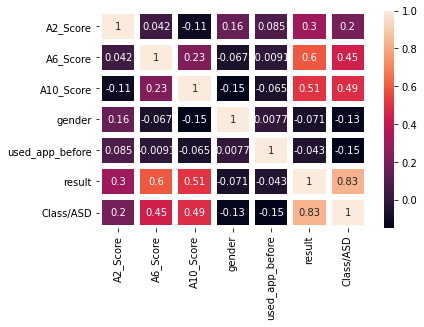

In [14]:
nn = dft[['A2_Score', 'A6_Score', 'A10_Score','gender', 'used_app_before', 'result','Class/ASD']]
sns.heatmap(nn.corr(),annot=True,linewidth=5)

In [15]:
sfss = SFS(LogisticRegression(),k_features=6,forward=False,floating=False,scoring='r2',cv=0)
sfss.fit(X,y)
sfss.k_feature_names_

('A1_Score', 'A5_Score', 'A7_Score', 'age', 'gender', 'result')

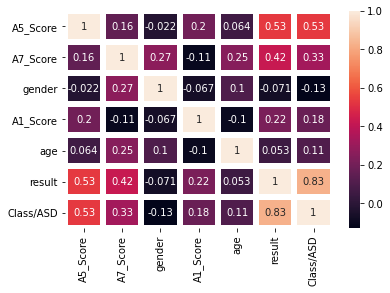

In [16]:
nn = dft[['A5_Score', 'A7_Score', 'gender', 'A1_Score','age', 'result','Class/ASD']]
sns.heatmap(nn.corr(),annot=True,linewidth=5)

In [17]:
sffs = SFS(LogisticRegression(),k_features=(3,11),forward=True,floating=True,cv=0)
sfss.fit(X,y)
sfss.k_feature_names_

('A1_Score', 'A5_Score', 'A7_Score', 'age', 'gender', 'result')

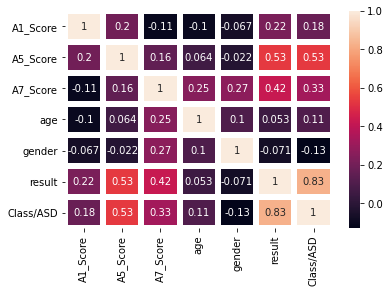

In [18]:
ns = dft[['A1_Score', 'A5_Score', 'A7_Score', 'age', 'gender', 'result','Class/ASD']]
sns.heatmap(ns.corr(),annot=True,linewidth=5)
t = df.corr()

In [19]:
X = dft[['A5_Score', 'A9_Score', 'A4_Score', 'A3_Score','A8_Score' ,'A10_Score', 'result']]
y = dft['Class/ASD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
dtree  = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
d_accuracy = dtree.score(X_test, y_test)*100
d_error = mean_absolute_error(y_test, predictions)
print('Accuracy =',d_accuracy)
print('Error = ',d_error)

[[16  1]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      1.00      0.98        25

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.98        42
weighted avg       0.98      0.98      0.98        42

Accuracy = 97.61904761904762
Error =  0.023809523809523808


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
rfc_pred = rfc.predict(X_test)

In [28]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
r_accuracy = rfc.score(X_test, y_test)*100
r_error = mean_absolute_error(y_test, rfc_pred)
print('Accuracy =',r_accuracy)
print('Error = ',r_error)

[[16  1]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      1.00      0.98        25

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.98        42
weighted avg       0.98      0.98      0.98        42

Accuracy = 97.61904761904762
Error =  0.023809523809523808


In [29]:
pd.crosstab(y_test,rfc_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,16,1
1,0,25


In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
lr_pred = lr.predict(X_test)

In [32]:
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
lr_accuracy = lr.score(X_test, y_test)*100
lr_error = mean_absolute_error(y_test, lr_pred)
print('Accuracy =',lr_accuracy)
print('Error = ',lr_error)

[[15  2]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.93      1.00      0.96        25

    accuracy                           0.95        42
   macro avg       0.96      0.94      0.95        42
weighted avg       0.96      0.95      0.95        42

Accuracy = 95.23809523809523
Error =  0.047619047619047616


In [33]:
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
s_pred = svc.predict(X_test)
print(confusion_matrix(y_test,s_pred))
print(classification_report(y_test,s_pred))
s_accuracy = svc.score(X_test, y_test)*100
s_error = mean_absolute_error(y_test, s_pred)
print('Accuracy =',s_accuracy)
print('Error = ',s_error)

[[14  3]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.89      1.00      0.94        25

    accuracy                           0.93        42
   macro avg       0.95      0.91      0.92        42
weighted avg       0.94      0.93      0.93        42

Accuracy = 92.85714285714286
Error =  0.07142857142857142


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [36]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
kn_accuracy = knn.score(X_test, y_test)*100
kn_error = mean_absolute_error(y_test, knn_pred)
print('Accuracy =',kn_accuracy)
print('Error = ',kn_error)

[[16  1]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.96      0.96      0.96        25

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42

Accuracy = 95.23809523809523
Error =  0.047619047619047616


In [37]:
list(zip(X_train, rfc.feature_importances_))

[(array([-1.1503866]), 1.0)]

In [38]:
y_pred = rfc.predict(X_test)
for i in range(10):
    print('Actual value: {:.3f} Predicted Value: {:.3f}'.format(y_test.values[i],y_pred[i]))

Actual value: 0.000 Predicted Value: 0.000
Actual value: 0.000 Predicted Value: 0.000
Actual value: 0.000 Predicted Value: 0.000
Actual value: 1.000 Predicted Value: 1.000
Actual value: 0.000 Predicted Value: 0.000
Actual value: 1.000 Predicted Value: 1.000
Actual value: 1.000 Predicted Value: 1.000
Actual value: 1.000 Predicted Value: 1.000
Actual value: 0.000 Predicted Value: 0.000
Actual value: 0.000 Predicted Value: 0.000


In [39]:
report = {'Model_Name':['Logistic_Regression','Decision_Tree','Random_forest_classifier','KNN','SVM'],
         'Accuracy':[lr_accuracy,d_accuracy,r_accuracy,kn_accuracy,s_accuracy],
         'Error':[lr_error,d_error,r_error,kn_error,s_error]}
performance_report = pd.DataFrame(report)
performance_report

,Model_Name,Accuracy,Error
0,Logistic_Regression,95.238095,0.047619
1,Decision_Tree,97.619048,0.023810
2,Random_forest_classifier,97.619048,0.023810
3,KNN,95.238095,0.047619
4,SVM,92.857143,0.071429
